Welcome to Tower Builder Game


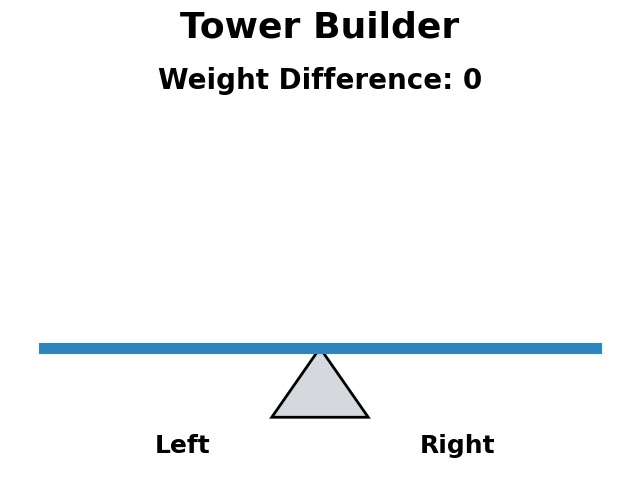


Player 1's Turn
Block weight = 6


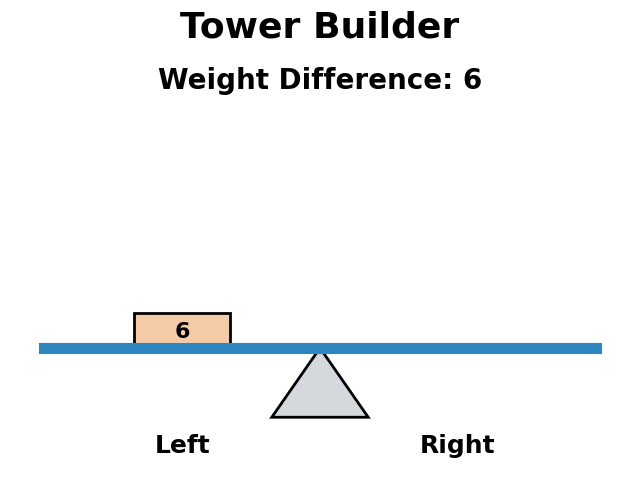


Player 2's Turn
Block weight = 1
Computer places block on left


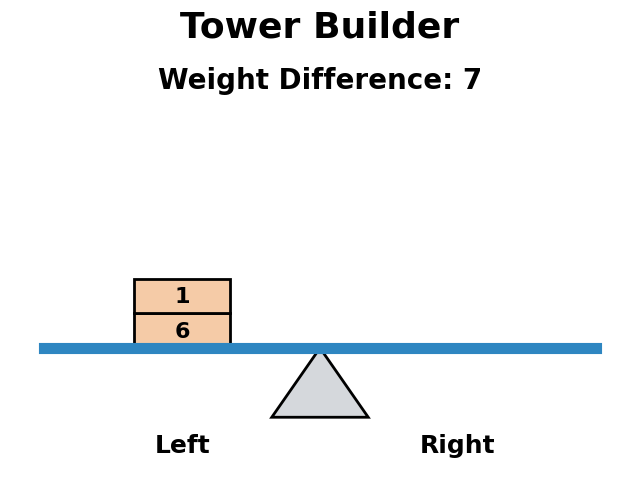


Player 1's Turn
Block weight = 8


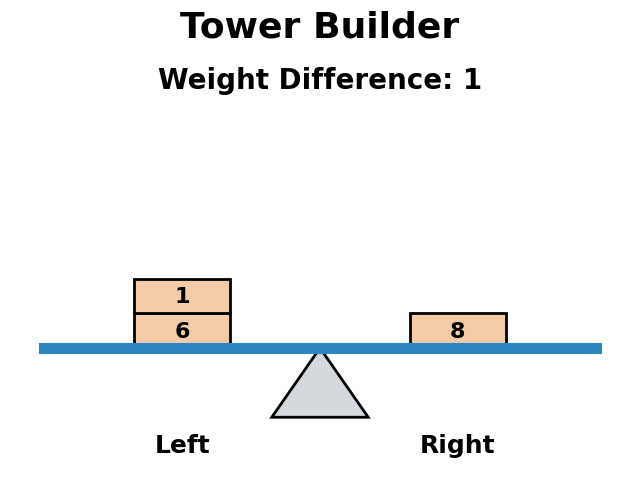


Player 2's Turn
Block weight = 8
Computer places block on right


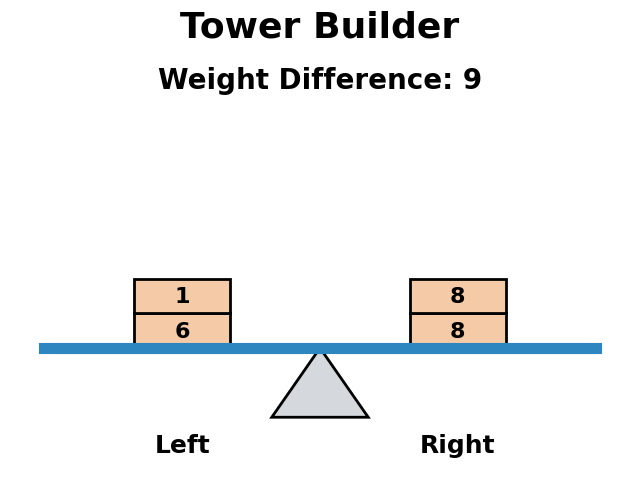


Player 1's Turn
Block weight = 2
Choose side (left/right): left


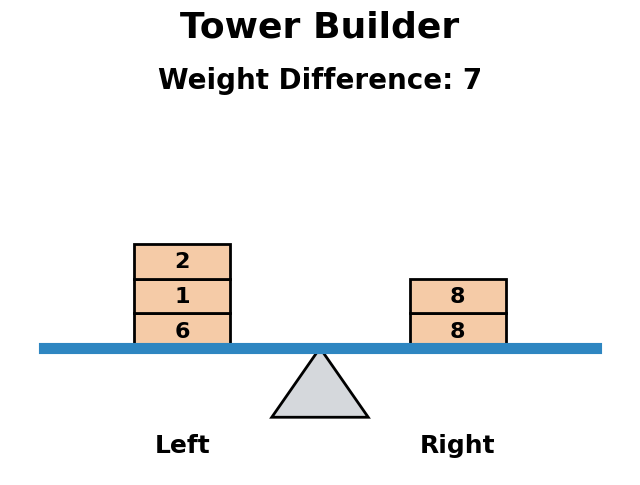


Player 2's Turn
Block weight = 7
Computer places block on right


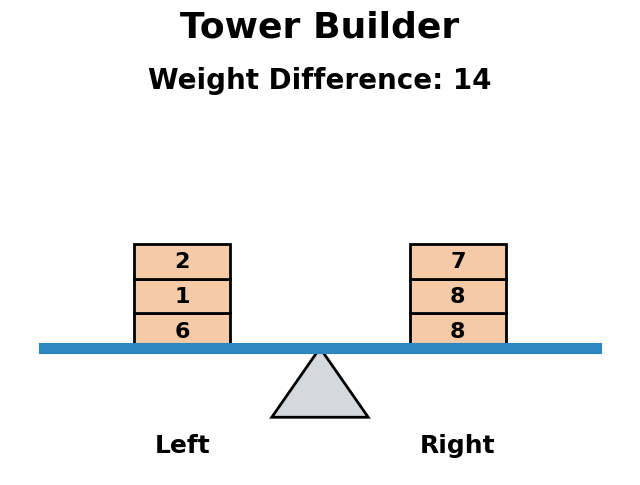

Tower collapsed. Player 2 loses.


In [7]:
import random
import matplotlib.pyplot as plt

def draw_tower(tower):
    left = tower['left']
    right = tower['right']

    fig, ax = plt.subplots(figsize=(8, 6))

    beam_y = 0
    block_h = 0.6   # Smaller blocks to avoid overlap
    block_w = 1.4

    # ---------- Title (Top, no overlap) ----------
    ax.text(0, 5.4, "Tower Builder",
            ha='center', fontsize=26,
            fontweight='bold')

    # ---------- Weight Difference ----------
    diff = abs(sum(left) - sum(right))
    ax.text(0, 4.5, f"Weight Difference: {diff}",
            ha='center', fontsize=20,
            fontweight='bold')

    # ---------- Beam ----------
    ax.plot([-4, 4], [beam_y, beam_y],
            linewidth=8, color='#2E86C1')

    # ---------- Triangle Support ----------
    triangle = plt.Polygon([[-0.7, -1.2], [0.7, -1.2], [0, beam_y]],
                           facecolor='#D5D8DC',
                           edgecolor='black', linewidth=2)
    ax.add_patch(triangle)

    # ---------- LEFT Tower ----------
    x_left = -2.7
    y = beam_y

    for w in left:
        rect = plt.Rectangle((x_left, y), block_w, block_h,
                             facecolor='#F5CBA7',
                             edgecolor='black',
                             linewidth=2)
        ax.add_patch(rect)

        ax.text(x_left + block_w/2, y + block_h/2, str(w),
                ha='center', va='center',
                fontsize=16, fontweight='bold')
        y += block_h

    # ---------- RIGHT Tower ----------
    x_right = 1.3
    y = beam_y

    for w in right:
        rect = plt.Rectangle((x_right, y), block_w, block_h,
                             facecolor='#F5CBA7',
                             edgecolor='black',
                             linewidth=2)
        ax.add_patch(rect)

        ax.text(x_right + block_w/2, y + block_h/2, str(w),
                ha='center', va='center',
                fontsize=16, fontweight='bold')
        y += block_h

    # ---------- Labels ----------
    ax.text(x_left + block_w/2, -1.8, "Left",
            ha='center', fontsize=18,
            fontweight='bold')

    ax.text(x_right + block_w/2, -1.8, "Right",
            ha='center', fontsize=18,
            fontweight='bold')

    # ---------- Layout ----------
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-2.2, 5.8)
    ax.axis('off')

    plt.show()


def is_unstable(tower, max_diff):
    return abs(sum(tower['left']) - sum(tower['right'])) > max_diff


def computer_choice():
    return random.choice(["left", "right"])


# ---------- GAME ----------
print("Welcome to Tower Builder Game")
mode = input("Enter 1 for Player vs Computer or 2 for Player vs Player: ").strip()

if mode not in ["1", "2"]:
    print("Invalid selection.")
    exit()

MAX_WEIGHT_DIFF = 10
tower = {'left': [], 'right': []}
player_turn = 1

# Initial diagram
draw_tower(tower)

while True:

    block_weight = random.randint(1, 10)
    print(f"\nPlayer {player_turn}'s Turn")
    print(f"Block weight = {block_weight}")

    if mode == "1" and player_turn == 2:
        side = computer_choice()
        print(f"Computer places block on {side}")
    else:
        side = input("Choose side (left/right): ").strip().lower()
        if side not in ["left", "right"]:
            print("Invalid input")
            continue

    tower[side].append(block_weight)

    draw_tower(tower)

    if is_unstable(tower, MAX_WEIGHT_DIFF):
        print(f"Tower collapsed. Player {player_turn} loses.")
        break

    player_turn = 2 if player_turn == 1 else 1